## 三角脉冲、矩形脉冲

### 导入模块

In [12]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

### 三角脉冲

生成 2 秒的三角形脉冲，采样率为 10 kHz，宽度为 20 ms。对一个矩形脉冲进行重复计算。

In [14]:
def triangular_pulse(start, end, width, step):
    xout = []
    yout = []
    #for x in range(-width, width, step):
    for x in range(start, end, step):
        if start<x<2*width:
            x = np.arange(start, 2*width, step)
            xout=x
            y = np.where(x >= width, 2*width - x, x)
            yout=y
        else:
            xout = np.append(xout,x)
            yout = np.append(yout,0)
    return xout, yout

输入已知的波形信息

In [15]:
fs = 10000  #采样频率
width = 200 #20ms 有 200 个点
end = 1200 #0.1s有20000个点，本案例中只选取前0.1秒的波形
start = 0
step = 1
a,b = triangular_pulse(start,end,width,step)
xi = np.arange(-800,0)#添加输出波形的负数部分
yi = np.zeros(800)
xo = np.append(xi,a)
yo = np.append(yi,b)
x = xo/10000-0.02 #将点数转变为时间和函数值
y = yo/200

No handles with labels found to put in legend.


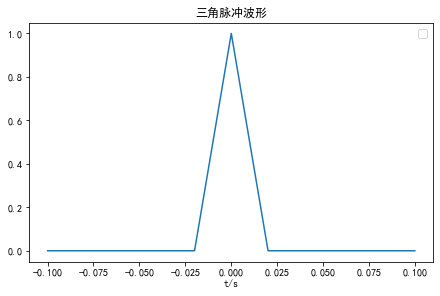

In [16]:
#绘图
fig,ax = plt.subplots(constrained_layout=True)
ax.plot(x,y)
ax.set_title('三角脉冲波形')
ax.set_xlabel('t/s')
ax.legend(fontsize=12)
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False 
fig.savefig('./三角脉冲波形.png',dpi=500)

### 矩形脉冲

In [17]:
def square_pulse(start, end, width, step):
    xout = []
    yout = []
    #for x in range(-width, width, step):
    for x in range(start, end, step):
        if start<x<width:
            x = np.arange(start, width, step)
            xout=x
            yout= np.ones(width)

        else:
            xout = np.append(xout,x)
            yout = np.append(yout,0)
    return xout, yout

输入已知的波形信息

In [18]:
fs = 10000  #采样频率
width = 400 #20ms 有 200 个点
end = 1200 #0.1s有20000个点，本案例中只选取前0.1秒的波形
start = 0
step = 1
a,b = square_pulse(start,end,width,step)
xi = np.arange(-800,0)#添加输出波形中的负数部分
yi = np.zeros(800)
xo = np.append(xi,a)
yo = np.append(yi,b)
x = xo/10000-0.02 #将点数值转变为时间值和函数值
y = yo

No handles with labels found to put in legend.


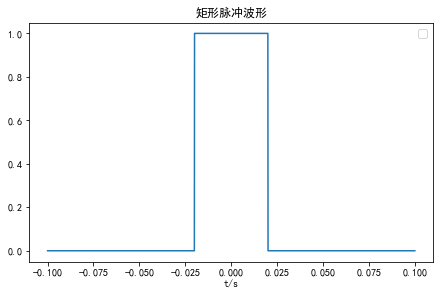

In [19]:
#绘图
fig,ax = plt.subplots(constrained_layout=True)
ax.plot(x,y)
ax.set_title('矩形脉冲波形')
ax.set_xlabel('t/s')
ax.legend(fontsize=12)
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False 
fig.savefig('./矩形脉冲波形.png',dpi=500)

### 拓展：高斯调制正弦脉冲

gauspuls 函数使用指定时间、中心频率和小数带宽生成高斯调制正弦脉冲。

sinc 函数计算输入向量或矩阵的数学正弦函数。正弦函数是宽度为 2π，高度为单位高度的矩形脉冲的连续傅里叶逆变换。

生成带宽为 60%、采样率为 1 MHz 的 50 kHz 高斯 RF 脉冲。当包络比峰值低 40 dB 时，截断脉冲。

Text(0.5, 1.0, '高斯调制正弦波')

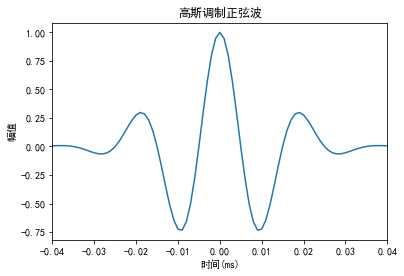

In [21]:
t = np.linspace(-0.04, 0.04, 80000, endpoint=False)
y1 = signal.gausspulse(t, fc=50000, bw=0.6, bwr=- 6, tpr=- 40, retquad=False, retenv=False)
plt.plot(t*1e3,y1)
plt.xlim((-0.04,0.04))
plt.xlabel('时间(ms)')
plt.ylabel('幅值')
plt.title('高斯调制正弦波')